#Bird identification based on voice spectrograms of their songs

# Download bird songs

The program downloads all the files found with the search terms into subdirectory with corresponding json files.


In [ ]:
import urllib.request, json
import sys
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
newpath = r'C:\Kursy\Szkolenie PFIG - Data Science\14. Projekt końcowy\Dataset'
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [ ]:
savePath = newpath

## Defining necessary functions
* Creates the subdirectory data/xeno-canto-dataset if necessary
* Downloads and saves json files for number of pages in a query
* and directory path to saved json's

In [ ]:
basePath = savePath

def save_json(searchTerms, birdName, country):
    numPages = 1
    page = 1
    bPath = savePath
    # create a path to save json files and recordings
    path = bPath + birdName.replace(':', '') + "/" + country
    if not os.path.exists(path):
        print("Creating subdirectory " + path + " for downloaded files...")
        os.makedirs(path)
        # download a json file for every page found in a query
    while page < numPages + 1:
        print("Loading page " + str(page) + "...")
        url = 'https://www.xeno-canto.org/api/2/recordings?query={0}&page={1}'.format(searchTerms.replace(' ', '%20'),
                                                                                      page)
        print(url)
        jsonPage = urllib.request.urlopen(url)
        jsondata = json.loads(jsonPage.read().decode('utf-8'))
        filename = path + "/jsondata_p" + str(page) + ".json"
        with open(filename, 'w') as outfile:
            json.dump(jsondata, outfile)
        # check number of pages
        numPages = jsondata['numPages']
        page = page + 1
    print("Found ", numPages, " pages in total.")
    # return number of files in json
    # each page contains 500 results, the last page can have less than 500 records
    print("Saved json for ", (numPages - 1) * 500 + len(jsondata['recordings']), " files")
    return path


# reads the json and return the list of values for selected json part
# i.e. "id" - ID number, "type": type of the bird sound such as call or song
# for all Xeno Canto files found with the given search terms.
def read_data(searchTerm, path):
    data = []
    numPages = 1
    page = 1
    # read all pages and save results in a list
    while page < numPages + 1:
        # read file
        with open(path + "/jsondata_p" + str(page) + ".json", 'r') as jsonfile:
            jsondata = jsonfile.read()
        jsondata = json.loads(jsondata)
        # check number of pages
        numPages = jsondata['numPages']
        # find "recordings" in a json and save a list with a search term
        for k in range(len(jsondata['recordings'])):
            data.append(jsondata["recordings"][k][searchTerm])
        page = page + 1
    return data


# downloads all sound files found with the search terms into xeno-canto directory
# into catalogue named after the search term (i.e. Apus apus)
# filename have two parts: the name of the bird in latin and ID number
def download(searchTerms, birdName, country):
    # create data/xeno-canto-dataset directory
    path = save_json(searchTerms, birdName, country)
    # get filenames: recording ID and bird name in latin from json
    filenamesID = read_data('id', path)
    filenamesCountry = read_data('cnt', path)
    # get website recording http download address from json
    fileaddress = read_data('file', path)
    numfiles = len(filenamesID)
    print("A total of ", numfiles, " files will be downloaded")
    for i in range(0, numfiles):
        print("Saving file ", i + 1, "/", numfiles,
              basePath + birdName.replace(':', '') + filenamesID[
                  i] + ".mp3")
        print(path + "/" + birdName + filenamesID[i] + ".mp3")
        urllib.request.urlretrieve(fileaddress[i],
                                   path + "/" + birdName + filenamesID[i] + ".mp3")


## Download
Example download with all sounds type song, from bird list recorded in selected countries

In [ ]:
# countries = ['Poland', 'Germany', 'Slovakia', 'Czech', 'Lithuania']

countries = ['Poland']

birds = [
#             'Bubo bubo'
#             'Alauda arvensis'
#             'Columba livia',
        ]

for country in countries:
    for bird in birds:
        download(bird + ' cnt:' + country + ' type:song', bird.replace(' ', ''), country)
for bird in birds:
    download(bird + ' type:song', bird.replace(' ', ''), 'countries')

#Data analysis


## Loading audio files with Librosa (dla 1 pliku - próba)





In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bubobubo_file = "/content/drive/MyDrive/Birds/DatasetBubobubo/countries/Bubobubo811192.mp3"
# bubobubo_file = "Bubobubo26852.mp3"

In [ ]:
ipd.Audio(bubobubo_file)

In [ ]:
# load audio files with librosa
bubobubo, sr = librosa.load(bubobubo_file, duration=20)

## Extracting Short-Time Fourier Transform

In [ ]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [ ]:
S_bubobubo = librosa.stft(bubobubo, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [ ]:
S_bubobubo.shape

(1025, 862)

In [ ]:
type(S_bubobubo[0][0])

numpy.complex64

## Calculating the spectrogram

In [ ]:
Y_bubobubo = np.abs(S_bubobubo) ** 2

In [ ]:
Y_bubobubo.shape

(1025, 862)

In [ ]:
type(Y_bubobubo[0][0])

numpy.float32

## Visualizing the spectrogram

In [ ]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

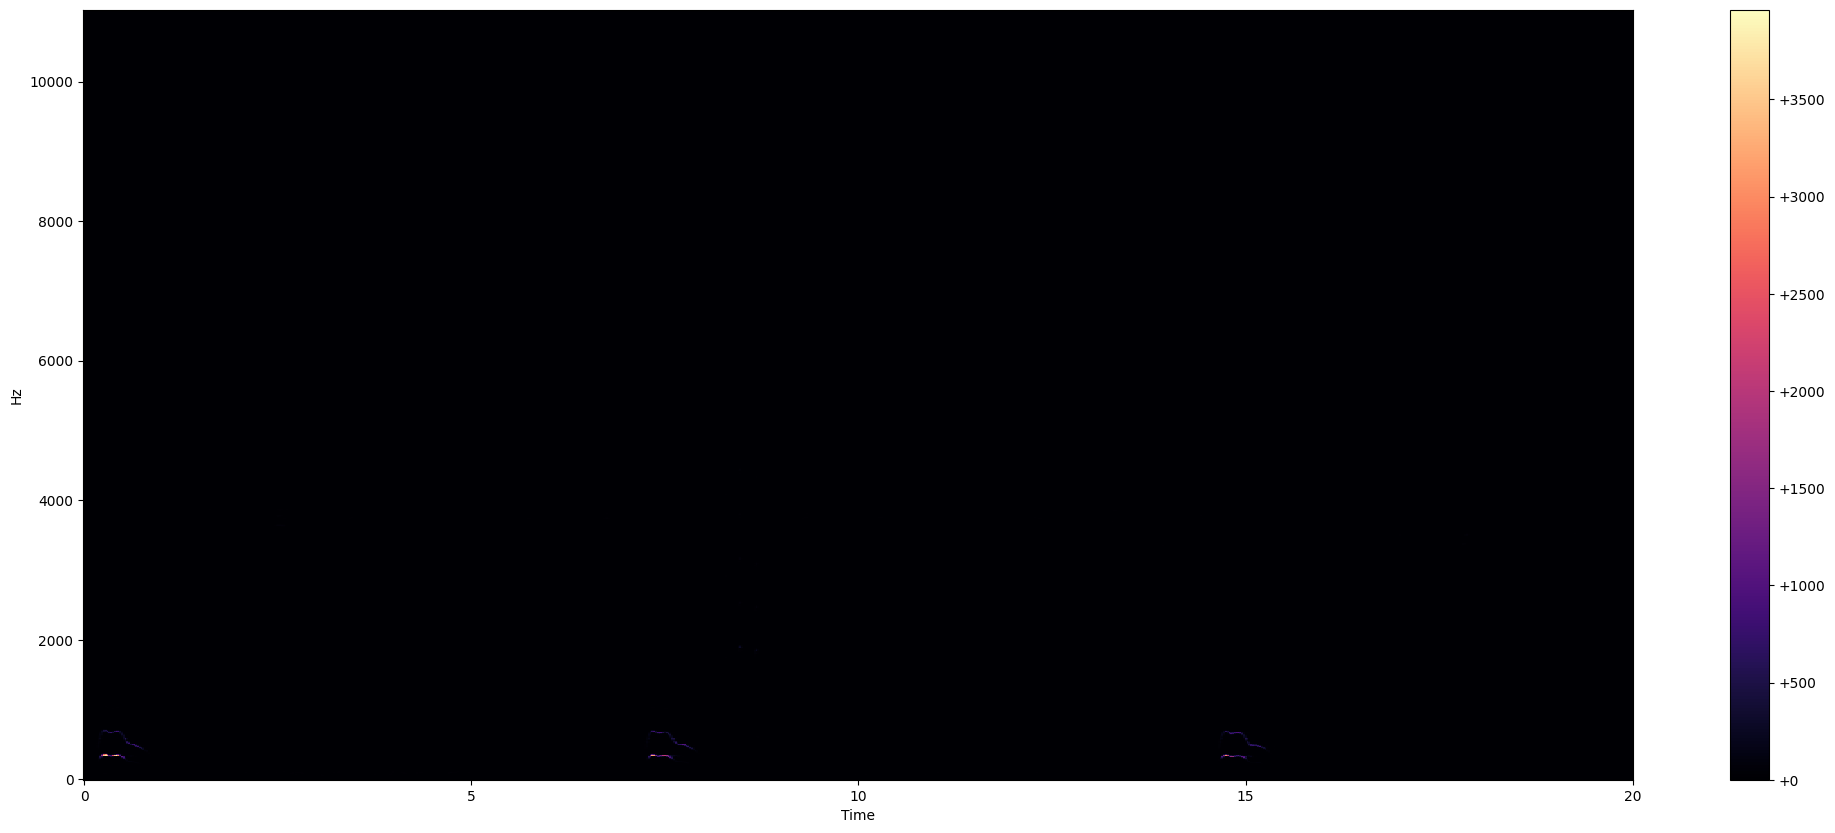

In [ ]:
plot_spectrogram(Y_bubobubo, sr, HOP_SIZE)

## Log-Amplitude Spectrogram

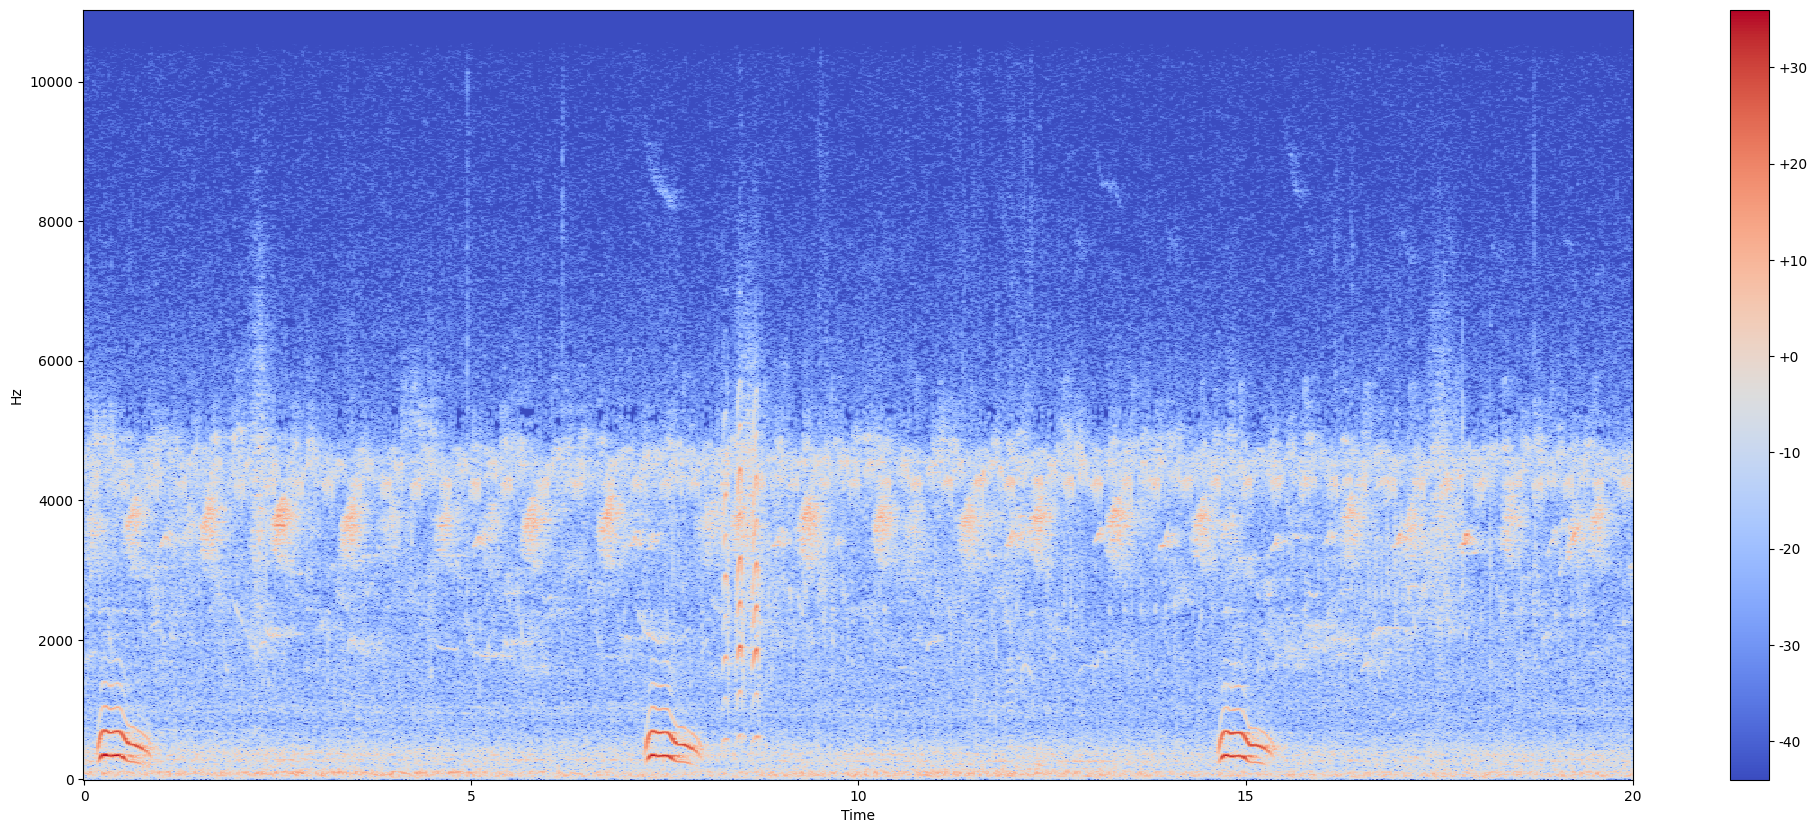

In [ ]:
Y_log_bubobubo = librosa.power_to_db(Y_bubobubo)
plot_spectrogram(Y_log_bubobubo, sr, HOP_SIZE)

## Log-Frequency Spectrogram

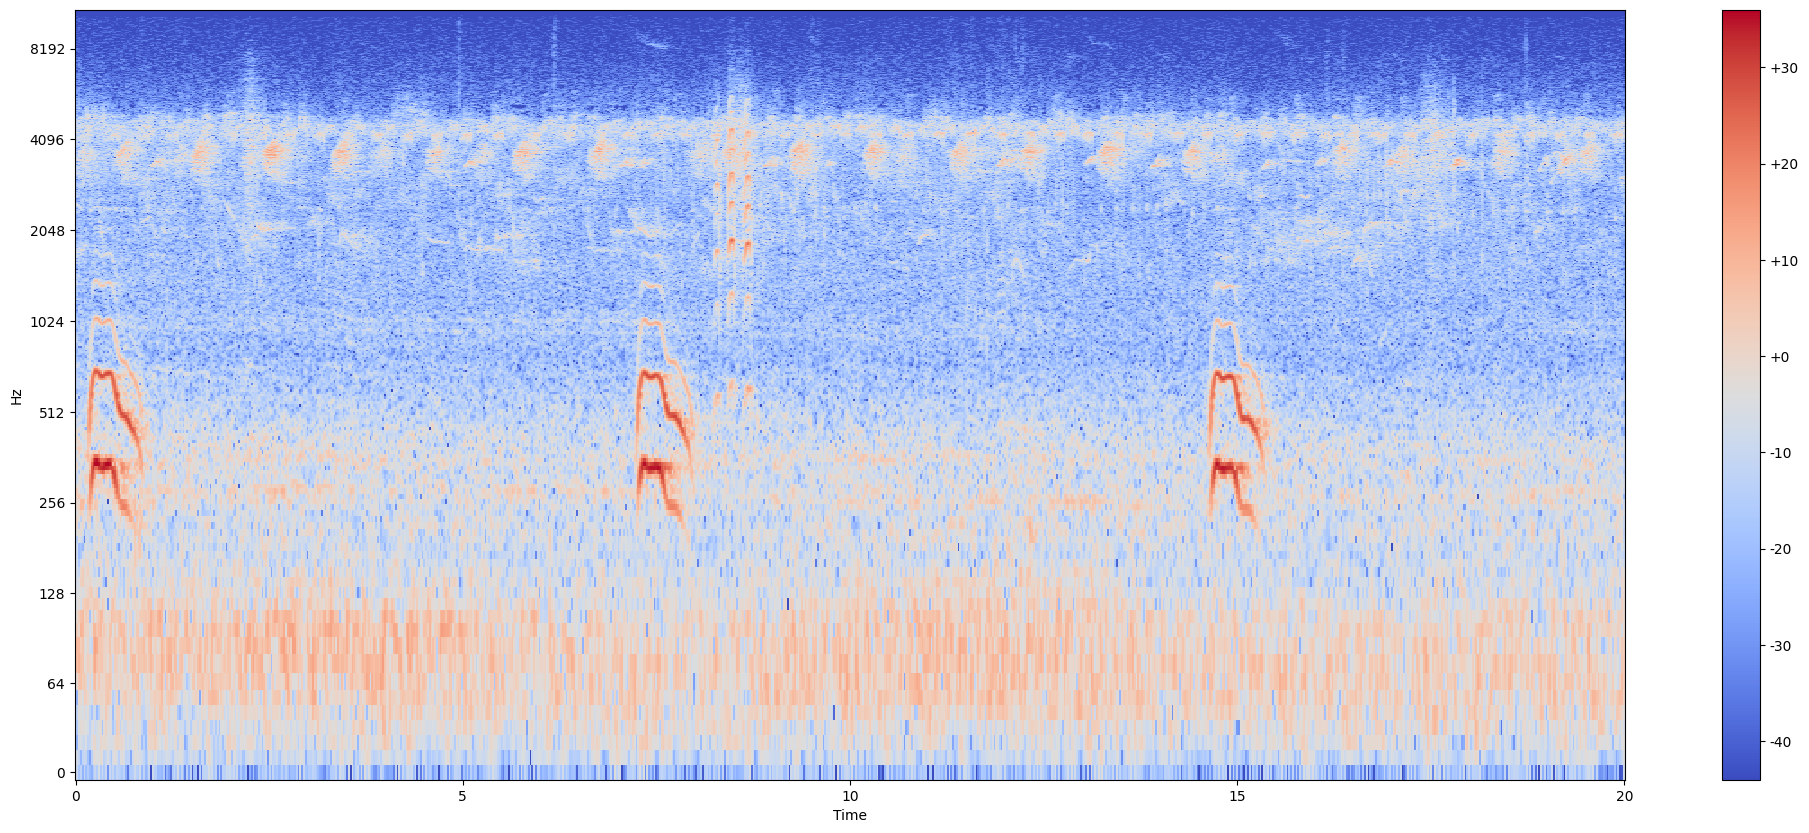

In [ ]:
plot_spectrogram(Y_log_bubobubo, sr, HOP_SIZE, y_axis="log")

# Converting bird songs into Log-Frequency Spectrograms
- Loading mp3 files from Google Drive for 3 different bird species


## Eurasian eagle-owl (Lat. Bubo bubo, Polish: Puchacz Zwyczajny)

In [ ]:
import glob, os
os.chdir(r"/content/drive/MyDrive/Birds/DatasetBubobubo/countries/")
pliki = []
for file in glob.glob("*.mp3"):
  pliki.append(file)


In [ ]:
pliki

['Bubobubo83603.mp3',
 'Bubobubo811192.mp3',
 'Bubobubo807276.mp3',
 'Bubobubo793397.mp3',
 'Bubobubo790291.mp3',
 'Bubobubo787256.mp3',
 'Bubobubo786496.mp3',
 'Bubobubo784023.mp3',
 'Bubobubo783695.mp3',
 'Bubobubo782216.mp3',
 'Bubobubo779442.mp3',
 'Bubobubo782214.mp3',
 'Bubobubo775817.mp3',
 'Bubobubo771506.mp3',
 'Bubobubo763817.mp3',
 'Bubobubo763816.mp3',
 'Bubobubo635982.mp3',
 'Bubobubo607296.mp3',
 'Bubobubo534798.mp3',
 'Bubobubo534612.mp3',
 'Bubobubo519758.mp3',
 'Bubobubo348864.mp3',
 'Bubobubo31077.mp3',
 'Bubobubo297798.mp3',
 'Bubobubo26852.mp3',
 'Bubobubo186644.mp3',
 'Bubobubo171035.mp3',
 'Bubobubo167701.mp3',
 'Bubobubo366027.mp3',
 'Bubobubo366026.mp3',
 'Bubobubo366025.mp3',
 'Bubobubo366024.mp3',
 'Bubobubo348865.mp3',
 'Bubobubo31076.mp3',
 'Bubobubo304909.mp3',
 'Bubobubo532785.mp3',
 'Bubobubo517581.mp3',
 'Bubobubo468206.mp3',
 'Bubobubo461798.mp3',
 'Bubobubo410857.mp3',
 'Bubobubo410856.mp3',
 'Bubobubo406741.mp3',
 'Bubobubo406740.mp3',
 'Bubobubo71502

In [ ]:
# Bubo Bubo
for file in pliki:
  bubobubo_file = "/content/drive/MyDrive/Birds/DatasetBubobubo/countries/"+ file

  # load audio files with librosa
  bubobubo, sr = librosa.load(bubobubo_file, duration=20)
  FRAME_SIZE = 2048
  HOP_SIZE = 512
  S_bubobubo = librosa.stft(bubobubo, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
  Y_bubobubo = np.abs(S_bubobubo) ** 2
  Y_log_bubobubo = librosa.power_to_db(Y_bubobubo)
  plot = plot_spectrogram(Y_log_bubobubo, sr, HOP_SIZE, y_axis="log")
  plt.axis('off')


  images_dir = '/content/drive/MyDrive/Birds/DatasetBubobubo/countries/Images'


  my_str = file[:-4]

  plt.savefig(f"{images_dir}/{my_str}")



##Eurasian skylark (Lat. Alauda arvensis, Polish: Skowronek zwyczajny)

In [ ]:
import glob, os
os.chdir(r"/content/drive/MyDrive/Birds/DatasetAlaudaarvensis/countries/")
pliki1 = []
for file in glob.glob("*.mp3"):
  pliki1.append(file)

In [ ]:
# alaudaarvensis
for file in pliki1:
  alaudaarvensis_file = "/content/drive/MyDrive/Birds/DatasetAlaudaarvensis/countries/"+ file
  # print(bubobubo_file)
  # load audio files with librosa
  alaudaarvensis, sr = librosa.load(alaudaarvensis_file, duration=20)
  FRAME_SIZE = 2048
  HOP_SIZE = 512
  S_alaudaarvensis = librosa.stft(alaudaarvensis, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
  Y_alaudaarvensis = np.abs(S_alaudaarvensis) ** 2
  Y_log_alaudaarvensis = librosa.power_to_db(Y_alaudaarvensis)
  plot = plot_spectrogram(Y_log_alaudaarvensis, sr, HOP_SIZE, y_axis="log")
  plt.axis('off')


  images_dir = '/content/drive/MyDrive/Birds/DatasetAlaudaarvensis/countries/Images'


  my_str = file[:-4]

  plt.savefig(f"{images_dir}/{my_str}")

##Rock dove (Lat. Columba livia, Polish: Gołąb skalny)

In [ ]:
# columbalivia
import glob, os
os.chdir(r"/content/drive/MyDrive/Birds/DatasetColumbalivia/countries/")
pliki2 = []
for file in glob.glob("*.mp3"):
  pliki2.append(file)

In [ ]:
# columbalivia
for file in pliki2:
  columbalivia_file = "/content/drive/MyDrive/Birds/DatasetColumbalivia/countries/"+ file

  # load audio files with librosa
  columbalivia, sr = librosa.load(columbalivia_file, duration=20)
  FRAME_SIZE = 2048
  HOP_SIZE = 512
  S_columbalivia = librosa.stft(columbalivia, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
  Y_columbalivia = np.abs(S_columbalivia) ** 2
  Y_log_columbalivia = librosa.power_to_db(Y_columbalivia)
  plot = plot_spectrogram(Y_log_columbalivia, sr, HOP_SIZE, y_axis="log")
  plt.axis('off')


  images_dir = '/content/drive/MyDrive/Birds/DatasetColumbalivia/countries/Images'


  my_str = file[:-4]

  plt.savefig(f"{images_dir}/{my_str}")

##Spliting dataset for: train, test and validation

In [ ]:
import splitfolders  # or import split_folders

input_folder = r'/content/drive/MyDrive/Birds/DatasetColumbalivia/countries/Images_final'

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#Train, val, test
splitfolders.ratio(input_folder, output=r'/content/drive/MyDrive/Birds/DatasetColumbalivia/countries/Images_final_cut',
                   seed=42, ratio=(.7, .2, .1),
                   group_prefix=None) # default values


# Split val/test with a fixed number of items
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# enable oversampling of imbalanced datasets, works only with fixed
splitfolders.fixed(input_folder, output=r'/content/drive/MyDrive/Birds/DatasetColumbalivia/countries/Images_final_cut',
                   seed=42, fixed=(35, 20),
                   oversample=False, group_prefix=None)

#Importing train, test and validation datasets

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [16]:
train_dataset = train.flow_from_directory(r'/content/drive/MyDrive/Birds/Images_final_cut/train',
                                          target_size= (256,256),
                                          batch_size = 10,
                                          class_mode ='categorical')

Found 239 images belonging to 3 classes.


In [17]:
validation_dataset = validation.flow_from_directory(r'/content/drive/MyDrive/Birds/Images_final_cut/val',
                                          target_size= (256,256),
                                          batch_size = 10,
                                          class_mode ='categorical')

Found 67 images belonging to 3 classes.


In [46]:
test_dataset = test.flow_from_directory(r'/content/drive/MyDrive/Birds/Images_final_cut/test',
                                          target_size= (256,256),
                                          batch_size = 38,
                                          class_mode ='categorical')

Found 38 images belonging to 3 classes.


In [19]:
model_10 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (256,256,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512, activation = 'relu'),

                                    tf.keras.layers.Dense(3, activation = 'sigmoid'),
                                    ]
                                   )

In [20]:
model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)      

In [21]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_10.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
hist_10 = model_10.fit(train_dataset, epochs=10, batch_size=10, validation_data=(validation_dataset))

Epoch 1/10
24/24 [==============================] - 19s 775ms/step - loss: 1.0398 - accuracy: 0.4393 - val_loss: 0.9113 - val_accuracy: 0.4478
Epoch 2/10
24/24 [==============================] - 18s 778ms/step - loss: 0.7583 - accuracy: 0.6946 - val_loss: 0.6662 - val_accuracy: 0.7015
Epoch 3/10
24/24 [==============================] - 17s 735ms/step - loss: 0.6817 - accuracy: 0.7448 - val_loss: 0.7411 - val_accuracy: 0.7015
Epoch 4/10
24/24 [==============================] - 18s 746ms/step - loss: 0.6010 - accuracy: 0.7615 - val_loss: 0.5086 - val_accuracy: 0.7463
Epoch 5/10
24/24 [==============================] - 19s 800ms/step - loss: 0.5076 - accuracy: 0.7908 - val_loss: 0.6009 - val_accuracy: 0.7612
Epoch 6/10
24/24 [==============================] - 17s 733ms/step - loss: 0.4418 - accuracy: 0.8159 - val_loss: 0.4532 - val_accuracy: 0.8060
Epoch 7/10
24/24 [==============================] - 17s 736ms/step - loss: 0.3765 - accuracy: 0.8619 - val_loss: 0.5238 - val_accuracy: 0.7910

# Plot loss and accuracy (model 10 epochs)

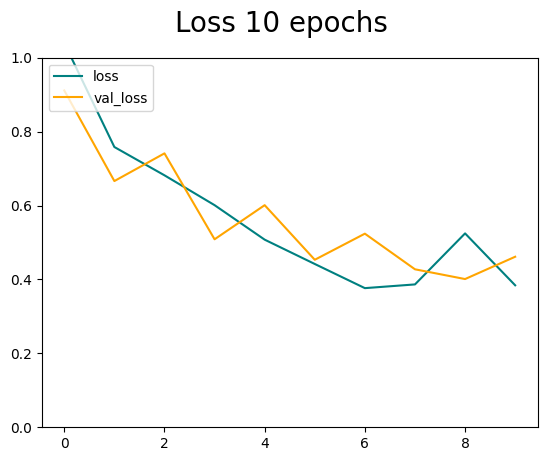

In [23]:
fig = plt.figure()
plt.plot(hist_10.history['loss'], color='teal', label='loss')
plt.plot(hist_10.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss 10 epochs', fontsize=20)
plt.legend(loc="upper left")
plt.ylim(0,1)
plt.show()

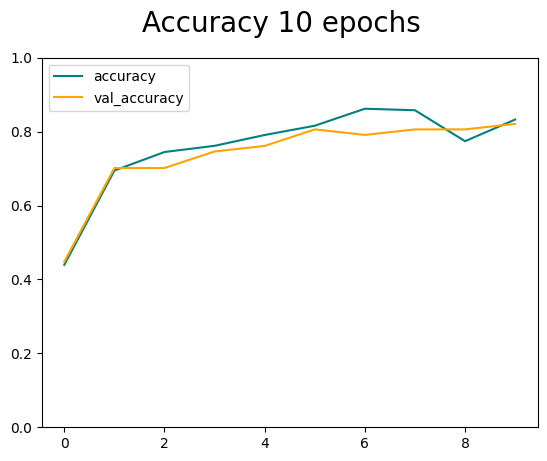

In [24]:
fig = plt.figure()
plt.plot(hist_10.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist_10.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy 10 epochs', fontsize=20)
plt.legend(loc="upper left")
plt.ylim(0,1)
plt.show()

In [25]:
test_dataset[0][1]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [26]:
y_pred = model_10.predict(test_dataset[0][0])

2/2 [==============================] - 0s 161ms/step


In [27]:
y_pred

array([[0.09760974, 0.47192863, 0.96032786],
       [0.45491397, 0.85385275, 0.29681954],
       [0.17357649, 0.81173795, 0.72750497],
       [0.19372676, 0.63274884, 0.9116631 ],
       [0.21411043, 0.85138386, 0.6102437 ],
       [0.99447495, 0.07392636, 0.10276502],
       [0.08325392, 0.920059  , 0.66476244],
       [0.4038751 , 0.54936326, 0.8243152 ],
       [0.97722626, 0.38582078, 0.05276316],
       [0.13658006, 0.46047807, 0.9419872 ],
       [0.05876096, 0.52512735, 0.9806794 ],
       [0.05133727, 0.5734797 , 0.9743561 ],
       [0.9395037 , 0.10148439, 0.5219886 ],
       [0.99634236, 0.09803297, 0.0590037 ],
       [0.98720527, 0.12372783, 0.14266318],
       [0.95079416, 0.1200999 , 0.4086858 ],
       [0.13159834, 0.49136472, 0.9453522 ],
       [0.9783901 , 0.3187079 , 0.08053097],
       [0.24661154, 0.60975623, 0.88221914],
       [0.99503314, 0.11355802, 0.06891619],
       [0.99724615, 0.07668323, 0.05774079],
       [0.9966642 , 0.12873998, 0.04301101],
       [0.

In [28]:
#changing y_pred to binary values
y_pred_rounded = []
for prediction in y_pred:
  single_list = []
  for pred in prediction:
    if pred > 0.5:
      single_list.append(1)
    else:
      single_list.append(0)
  y_pred_rounded.append(single_list)

y_pred_rounded = np.array(y_pred_rounded)

In [29]:
y_pred_rounded

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [0, 1, 1],
       [0, 1, 1],
       [1, 0, 0],
       [0, 1, 1],
       [0, 1, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 0, 0]])

In [30]:
from sklearn.metrics import classification_report
cr_10 = classification_report(y_pred_rounded, test_dataset[0][1])
print(f"{cr_10}")

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      0.63      0.77        19
           2       1.00      0.65      0.79        20

   micro avg       1.00      0.72      0.84        53
   macro avg       1.00      0.74      0.84        53
weighted avg       1.00      0.72      0.83        53
 samples avg       1.00      0.80      0.87        53



#Training model with 30 epochs

In [31]:
model_30 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (256,256,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512, activation = 'relu'),

                                    tf.keras.layers.Dense(3, activation = 'sigmoid'),
                                    ]
                                   )

In [32]:
model_30.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [33]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_30.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [34]:
hist_30 = model_30.fit(train_dataset, epochs=30, batch_size=4, validation_data=(validation_dataset))

Epoch 1/30
24/24 [==============================] - 18s 746ms/step - loss: 1.1479 - accuracy: 0.4100 - val_loss: 1.0194 - val_accuracy: 0.4478
Epoch 2/30
24/24 [==============================] - 19s 781ms/step - loss: 0.9525 - accuracy: 0.5481 - val_loss: 0.8468 - val_accuracy: 0.5970
Epoch 3/30
24/24 [==============================] - 19s 790ms/step - loss: 0.7995 - accuracy: 0.6778 - val_loss: 0.7910 - val_accuracy: 0.6716
Epoch 4/30
24/24 [==============================] - 17s 713ms/step - loss: 0.6764 - accuracy: 0.7490 - val_loss: 0.6638 - val_accuracy: 0.6716
Epoch 5/30
24/24 [==============================] - 17s 715ms/step - loss: 0.5942 - accuracy: 0.7699 - val_loss: 0.5774 - val_accuracy: 0.7313
Epoch 6/30
24/24 [==============================] - 19s 795ms/step - loss: 0.5717 - accuracy: 0.7908 - val_loss: 0.6778 - val_accuracy: 0.7761
Epoch 7/30
24/24 [==============================] - 17s 713ms/step - loss: 0.5641 - accuracy: 0.7908 - val_loss: 0.6149 - val_accuracy: 0.7463

#Plot loss and accuracy (model 10 epochs)

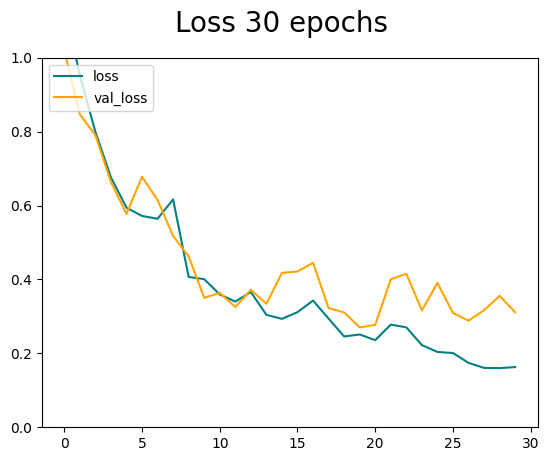

In [37]:
fig = plt.figure()
plt.plot(hist_30.history['loss'], color='teal', label='loss')
plt.plot(hist_30.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss 30 epochs', fontsize=20)
plt.legend(loc="upper left")
plt.ylim(0,1)
plt.show()

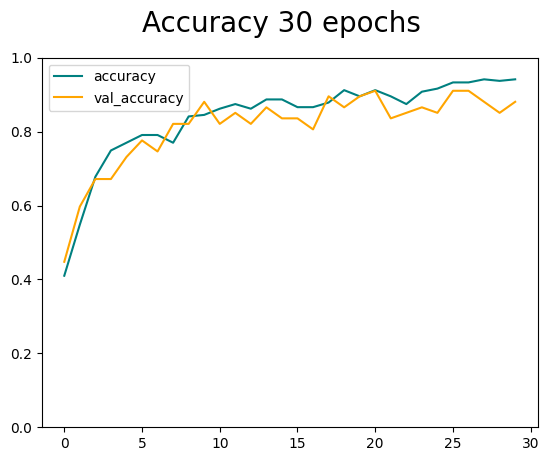

In [38]:
fig = plt.figure()
plt.plot(hist_30.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist_30.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy 30 epochs', fontsize=20)
plt.legend(loc="upper left")
plt.ylim(0,1)
plt.show()

In [47]:
test_dataset[0][1]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [48]:
y_pred = model_30.predict(test_dataset[0][0])

2/2 [==============================] - 0s 11ms/step


In [49]:
y_pred

array([[9.99719918e-01, 4.70220260e-02, 1.72709581e-02],
       [1.03760464e-02, 9.58930373e-01, 7.28541374e-01],
       [4.18116385e-03, 9.79447782e-01, 7.13287592e-01],
       [3.68532189e-03, 9.88945544e-01, 5.96874356e-01],
       [8.51538382e-04, 7.46696889e-01, 9.89384711e-01],
       [4.72622812e-02, 9.79080021e-01, 2.65235782e-01],
       [9.92196679e-01, 5.47483675e-02, 2.17282593e-01],
       [1.01232035e-02, 9.78712916e-01, 5.84144473e-01],
       [6.33616187e-03, 5.34245849e-01, 9.80560839e-01],
       [2.14226767e-02, 9.56077874e-01, 5.87704718e-01],
       [9.99902606e-01, 4.48762737e-02, 7.94939511e-03],
       [2.60690674e-02, 9.86298203e-01, 2.55975425e-01],
       [9.99953151e-01, 3.00268997e-02, 7.99491163e-03],
       [9.00800631e-04, 9.23443913e-01, 9.66569483e-01],
       [9.99730051e-01, 3.83886658e-02, 2.29234993e-02],
       [9.99904275e-01, 1.57459918e-02, 2.11998671e-02],
       [5.83690666e-02, 9.60057616e-01, 3.51634443e-01],
       [1.13618216e-02, 6.99315

In [50]:
#changing y_pred to binary values
y_pred_rounded = []
for prediction in y_pred:
  single_list = []
  for pred in prediction:
    if pred > 0.5:
      single_list.append(1)
    else:
      single_list.append(0)
  y_pred_rounded.append(single_list)

y_pred_rounded = np.array(y_pred_rounded)

In [51]:
from sklearn.metrics import classification_report
cr_30 = classification_report(y_pred_rounded, test_dataset[0][1])
print(f"{cr_30}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.50      0.67        24
           2       1.00      0.76      0.87        17

   micro avg       1.00      0.70      0.83        54
   macro avg       1.00      0.75      0.84        54
weighted avg       1.00      0.70      0.81        54
 samples avg       1.00      0.79      0.86        54



#Conclusions

The goal of my project was to identify the bird by using the samples of their voices. The signal was tranmuted to the log-frequency spectrograms and loaded to the model. I choose 3 different kind of bird species with unique odd voices from each other.

1. Label number 0 was for Eurasian eagle-owl (Lat. Bubo bubo, Polish: Puchacz Zwyczajny) - 105 mp3 samples

2. Label number 1 was for Eurasian skylark (Lat. Alauda arvensis, Polish: Skowronek zwyczajny) - 125 mp3 samples

3. Label number 2 was for Rock dove (Lat. Columba livia, Polish: Gołąb skalny) - 124 mp3 samples

The number of samples for each of the bird species was quite similar, so it is a well balanced for learning the model.  

Analysing the results F1 score of the model for each classes there is following conclusions:
- model predict very well for a label number 0, probably because of a characteristic sound of a Eurasian eagle-owl, repeatable and outstanding from the noice of the environment. That was easy to learn by an algorithm of the model.
- model predictions for Rock dove (label with number 2) was less satisfying than for Eurasian eagle-owl but still on a high level of detection.
- for Eurasian skylark the results wasthe lowest in comparison to prediction of other two classes of the birds. It can be because of more complex and less regular voice of Eurasian skylark.

Learning model with 10 epochs give a better results of F1 score for bird with label number 1 than model with 30 epochs, but the remaining 2 labels of the birds was less accuracy. Increasing the number of epochs led to increasing the positive predictions for two classes of birds with label 0 and 2.
